# PyUedge Jupyter Notebook


### This notebook is to help get users started using the Python version of UEDGE.

Start off by importing uedge. If installed you should see the CVS tag for your installed version. Note that because of the method used to bind the compiled fortran code to Python, the variables and functions contained within the packages is hidden. (To execute code blocks select and then type control-return)


In [1]:
from uedge import *
print(bbb.uedge_ver)
print(dir(bbb))
from case_setup import *         # sets up sizing variables and allocate space for case, provided for illustration

[b'$Name:  $                                                                       ']
['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__']


If the previous cell fails uncomment the the following cell (remove the #) and run.

In [2]:
! #pip install uedge --upgrade
! pip install wurlitzer
%load_ext wurlitzer

As of this version most of PyUedge cases are translated from ones originally run with the Basis version of the code. Because of this it is worth a short description of issues encountered doing this conversion.

There are a few differences between the Python and Basis environments the user must be aware of.

1. Python variables must reference the package while Basis has a priority based namespace. In Basis uedge_ver can be used without specifying "bbb" while in Python the package is required as in bbb.uedge_ver. To convert an existing Basis script start by using the application "__bas2py__ basis_file python_file" to get started. This will add the package references for you. 
1. Basis arrays may have variable index start or stop values. Basis variables start at 1 and use parentheses; Python variables always start at 0 and uses square brackets. If values assigned are indices then they should probably follow Fortran rules: start with 1 and row major.
    - nxleg(1,1)=4 # basis
        - com.nxleg[1,]=[12,10] # python
    - kelighi(igsp) = 5.e-16 # basis
        - bbb.kelighi[bbb.igsp-1] = 5.e-16    # python
    - Basis initialization with do-loop (Note that index ranges are both ends inclusive. (1:3) is 1,2,3)
```fortran
  do ijk = nhsp+1, nhsp+6
      difniv(0:ny+1,ijk) = pd
  enddo 
```
    - Python initialization with for-loop (Note that index ranges are only left side inclusive. [1:4] is 1,2,3)
```python
for ijk in arange(com.nhsp,com.nhsp+6):
   bbb.difniv[0:com.ny+2,ijk] = pd
```




# Save/Restore

## PDB (PFB) Files - The Basis save file format.

This requires that the pact python module has been installed . This is supported on a limited number of systems. The GA cluster Iris and the LLNL cluster Singe are the main platforms that support this.

In [3]:
try:
    from uedge.pdb_restore import * # if this fails pact is likely not installed
    pdb_restore('d3d.pdb')          # variable tgs is not included, no error
    
except:
    print("pact not installed?")
    
    
    

pact not installed?


## HDF5 Files - The Python save file format.

This requires that the h5py python module has been installed. This is part of the Anaconda distribution.

In [4]:
try:
    from uedge.hdf5 import *        # if this fails h5py is likely not installed
    hdf5_restore('d3d.hdf5')        # variable tgs is not included and don't worry aroub "Old style" file
    
except:
    print("h5py not installed?")
    
    

Old style hdf5 file
Couldn't read tipers from   d3d.hdf5


## Run a case

- Basis - exmain
- Python - bbb.exmain()


In [5]:
from uedge import *
bbb.exmain()   # 
print("Usual iteration output should be in terminal window running Jupyter Notebook")
print("nksol ---  iterm = ",bbb.iterm)


 UEDGE $Name:  $                                                                       
Usual iteration output should be in terminal window running Jupyter Notebook
nksol ---  iterm =  4
 Wrote file "gridue" with runid:    EFITD    09/07/90      # 66832 ,2384ms                    

 ***** Grid generation has been completed
  Updating Jacobian, npe =                      1
 iter=    0 fnrm=      2.134077960622300     nfe=      1
  Updating Jacobian, npe =                      2
 iter=    1 fnrm=      2.085549006437411     nfe=     15
 iter=    2 fnrm=      1.967029464015246     nfe=     34
 iter=    3 fnrm=      1.880813376966076     nfe=     58
 iter=    4 fnrm=      1.818874700008892     nfe=     89
 iter=    5 fnrm=      1.759699099787404     nfe=    126
  Updating Jacobian, npe =                      3
 iter=    6 fnrm=      1.772074538774433     nfe=    146
 iter=    7 fnrm=      1.717625702386033     nfe=    168
 iter=    8 fnrm=      1.724053686995089     nfe=    188
 iter=    9 

# Plotting

### Plot the Mesh


    plotmesh(ixmin=<int>,ixmax=<int>,iymin=<int>,iymax=<int>
             title=<string>,r_min=<val>,r_max=<val>,z_min=<val>,z_max=<val>,
             block=<True|False>)

       Plot the uedge grid.
       where ixmin, ixmax, iymin, and iymax are integer variables or
       expressions used to plot a portion of the grid. title is used as
       both the title and the figure name. Block default is True.

       The plot axis limits may be specified with r_rmin,r_max,z_min,z_max.
    


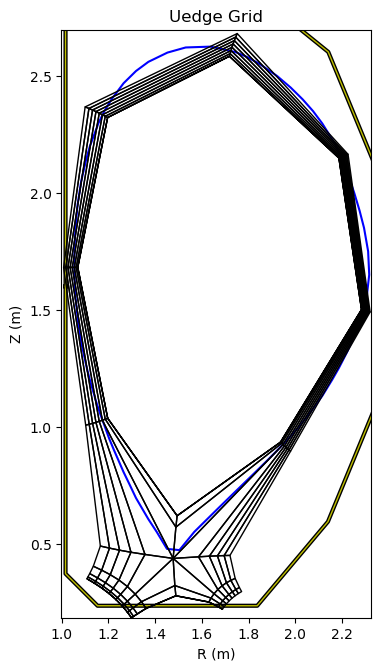

In [6]:
from uedge.uedgeplots import *
import warnings
warnings.filterwarnings("ignore") # ignore warnings for this notebook
# next line is only for this notebook, do not include this in your python files
%matplotlib inline 
print(plotmesh.__doc__)
plotmesh()

### Plot a 2-D (mesh size) Quantity


    plotmeshval(val,ixmin=<int>,ixmax=<int>,iymin=<int>,iymax=<int>
             title=<string>,units=<string>,block=<True|False>)

       Display Uedge 2-D quantity using polyfill.
       where ixmin, ixmax, iymin, and iymax are integer variables or
       expressions used to plot a portion of the grid. title is used as
       both the title and the figure name. Units are displayed in the
       side colorbar. Block default is True.

       The plot axis limits may be specified with r_rmin,r_max,z_min,z_max.
    
(18, 10)


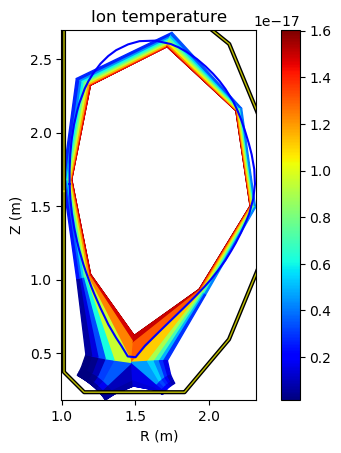

In [7]:
from uedge.uedgeplots import *
import warnings
warnings.filterwarnings("ignore") # ignore warnings for this notebook
# next line is only for this notebook, do not include this in your python files
%matplotlib inline
print(plotmeshval.__doc__)
print(bbb.tis.shape)
plotmeshval(bbb.tis,title='Ion temperature')

### Plot a 1-D Profile


    profile(xval,yval,title=<None>,style=<None>,linewidth=<None>,xlabel=<None>,ylabel=<None>,block=<True|False>)
       title is used as both the title and the figure name.
       Interactive is turned on so subsequent calls go to the same plot
       Style encoded color, line, and marker.  See matplotlib documention.
       examples: black solid line  - style='k-'
                 red circle marks  - style='ro'
                 green x marks and dotted line - style='gx--'
    


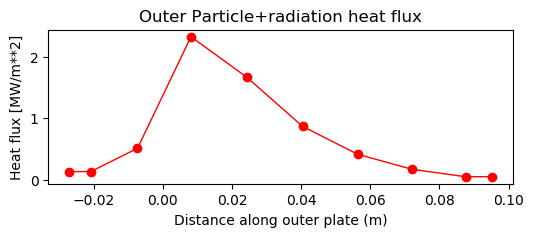

In [8]:
from uedge.uedgeplots import *
import warnings
warnings.filterwarnings("ignore") # ignore warnings for this notebook
# next line is only for this notebook, do not include this in your python files
%matplotlib inline
bbb.plateflux()
print(profile.__doc__)
#
#  Run in python these two traces will be on the same plot
#
profile(com.yyrb,1.e-6*(bbb.sdtrb+bbb.sdrrb),
        title="Outer Particle+radiation heat flux", 
        xlabel="Distance along outer plate (m)", 
        ylabel="Heat flux [MW/m**2]",
        figsize=(6,2),style='ro-'
    )

### Misc Plots - uncomment and run cell

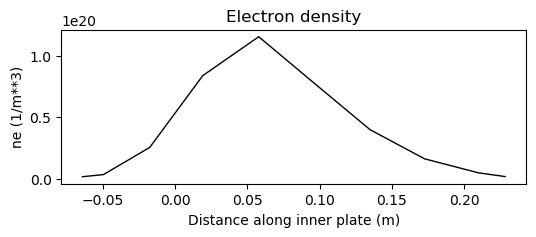

In [9]:
#******************************************************************
#For details of generic plot options, see https::/matplotlib.org/
#******************************************************************
#
#---------------------------------------------------------------------
#First, be sure you have loaded uedgeplots within an ipython session:
#---------------------------------------------------------------------

from uedge.uedgeplots import *
import warnings
warnings.filterwarnings("ignore") # ignore warnings for this notebook
# next line is only for this notebook, do not include this in your python files
%matplotlib inline 

#=======
#Plotting profiles on outer divertor plate:
#=======

#profile(com.yyrb,bbb.ne[com.nx,],title="Electron density", xlabel="Distance along outer plate (m)", ylabel="ne(1/m**3)",figsize=(6,2))

#profile(com.yyrb,bbb.ng[com.nx,],title="Hydrogen atom density", xlabel="Distance along outer plate (m)", ylabel="ng(1/m**3)",figsize=(6,2))

#profile(com.yyrb,bbb.te[com.nx,]/bbb.ev,title="Electron temperature", xlabel="Distance along outer plate (m)", ylabel="Te (eV)",figsize=(6,2))

#profile(com.yyrb,bbb.ti[com.nx,]/bbb.ev,title="Ion temperature", xlabel="Distance along outer plate (m)", ylabel="Ti (eV)",figsize=(6,2))

#profile(com.yyrb,bbb.feex[com.nx,],title="Electron thermal heat flux *area", xlabel="Distance along outer plate (m)", ylabel="feex",figsize=(6,2))

#profile(com.yyrb,bbb.feix[com.nx,],title="Ion/atom thermal heat flux *area", xlabel="Distance along outer plate (m)", ylabel="feix",figsize=(6,2))

# To plot the total heat flux on the outer divertor:
#bbb.plateflux()
#profile(com.yyrb,1.e-6*(bbb.sdtrb+bbb.sdrrb),title="Particle+radiation heat flux", xlabel="Distance along outer plate (m)", ylabel="Heat flux [MW/m**2]",figsize=(6,2))

#=======
#Plotting profiles on inner divertor plate:
#=======
profile(com.yylb,bbb.ne[0,],title="Electron density", xlabel="Distance along inner plate (m)", ylabel="ne (1/m**3)",figsize=(6,2))

#profile(com.yylb,bbb.ng[0,],title="Hydrogen atom density", xlabel="Distance along inner plate (m)", ylabel="ng(1/m**3)",figsize=(6,2))

#profile(com.yylb,bbb.te[0,]/bbb.ev,title="Electron temperature", xlabel="Distance along inner plate (m)", ylabel="Te (eV)",figsize=(6,2))

#profile(com.yylb,bbb.ti[0,]/bbb.ev,title="Ion temperature", xlabel="Distance along inner plate (m)", ylabel="Ti (eV)",figsize=(6,2))

#profile(com.yylb,-bbb.feex[0,],title="Electron thermal heat flux *area", xlabel="Distance along inner plate (m)", ylabel="feex",figsize=(6,2))

#profile(com.yylb,-bbb.feix[0,],title="Ion/atom thermal heat flux *area", xlabel="Distance along inner plate (m)", ylabel="feix",figsize=(6,2))

# To plot the total heat flux on the inner divertor:
#bbb.plateflux()
#profile(com.yylb,1.e-6*(bbb.sdtlb+bbb.sdrlb),title="Particle+radiation heat flux", xlabel="Distance along inner plate (m)", ylabel="Heat flux [MW/m**2]",figsize=(6,2))


#=======
#Plotting midplane profiles:
#=======

#profile(com.yylb,bbb.ne[bbb.ixmp,],title="Electron density at midplane", xlabel="Distance from separatrix (m)", ylabel="ne (1/m**3)",figsize=(6,2))

#profile(com.yylb,bbb.ng[bbb.ixmp,],title="Hydrogen atom density at midplane", xlabel="Distance from separatrix (m)", ylabel="ng(1/m**3)",figsize=(6,2))

#profile(com.yylb,bbb.te[bbb.ixmp,]/bbb.ev,title="Electron temperature at midplane", xlabel="Distance from separatrix (m)", ylabel="Te (eV)",figsize=(6,2))

#profile(com.yylb,bbb.ti[bbb.ixmp,]/bbb.ev,title="Ion temperature at midplane", xlabel="Distance from separatrix (m)", ylabel="Ti (eV)",figsize=(6,2))


